In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
zgony=pd.read_excel('zgony_org.xlsx',sheet_name='Arkusz1', header=0)

In [2]:
Num=38036100 #liczba ludzi GUS 2021
Num_k=0.517*Num
Num_m=0.483*Num
#print(zgony.head())  wypisze pierwsze 5
#zgony['przyczyna wyjściowa'].head() wypisze pierwsze 5 z kolumny przyczyny wyjsciowej
#zgony['przyczyna wyjściowa'].unique() wypisze unikatowe przyczyny w

female=zgony[  zgony['płeć'] == 2  ]
male=zgony[  zgony['płeć'] == 1  ]

x,y=zgony.shape
mx,my=male.shape
fx,fy=female.shape

print(zgony.shape)
print(male.shape)
print(female.shape)

(519517, 24)
(268658, 24)
(250859, 24)


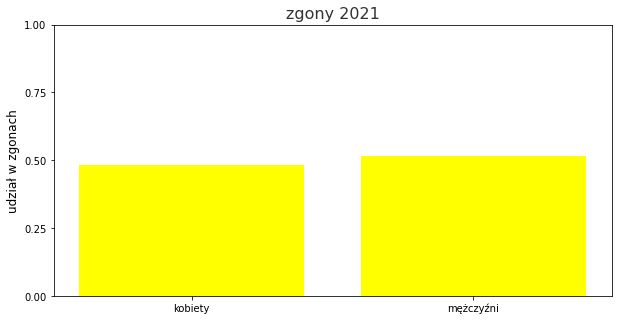

In [3]:
# Make a dataset:
height = [fx/x, mx/x]
bars = ('kobiety', 'mężczyźni')
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, height, color = 'yellow')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0, 1,5))

plt.ylabel('udział w zgonach', fontsize=12)
plt.title('zgony 2021', fontsize=16, color='#323232')
 
# Show graphic
plt.savefig('female_vs_male.png')
plt.show();

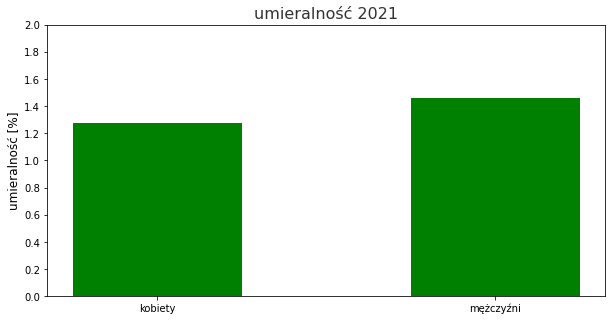

In [4]:
height = [fx*100/Num_k, mx*100/Num_m]
bars = ('kobiety', 'mężczyźni')
y_pos = np.arange(len(height))
#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, height, color = 'green', width=0.5)
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0.0, 2.0, num=11))


plt.ylabel('umieralność [%]', fontsize=12)
plt.title('umieralność 2021', fontsize=16, color='#323232')
 

# Show graphic
plt.savefig('female_vs_male_smierterlnosc.png')
plt.show();

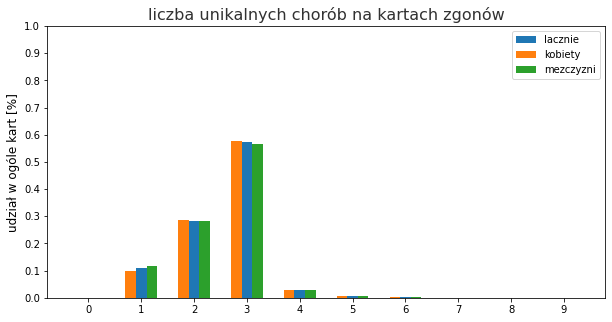

In [10]:
wiersze=1 #liczba wierszy która chcemy zbadać

#for index, row in zgony.iloc[0:wiersze, :].iterrows():

    # start_column = 2
    # for column in zgony.iloc[:,start_column:17]:
    #     print(column)
    #     if pd.isna(row[column]):
    #         print("nan")
    #         break
    #     else:
    #         values[index]+=1 

counts1=np.empty(10) 
counts2=np.empty(10) 
counts3=np.empty(10) 

def funkcja(df):
    a=(df.nunique(axis=1)-2)
    counts=a.value_counts()
    return counts,a

cfemale,f=funkcja(female)
cmale,m=funkcja(male)
counts,all=funkcja(zgony)

for i in range(1,10,1):
    counts1[i]=counts[i]/len(all)
    counts2[i]=cfemale[i]/len(f)
    counts3[i]=cmale[i]/len(m)

y_pos = np.arange(len(counts3))
bars = ('0', '1' , '2' , '3', '4', '5', '6', '7', '8', '9')

#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, counts1, width=0.2, label='lacznie')
plt.bar(y_pos-0.2, counts2, width=0.2, label='kobiety')
plt.bar(y_pos+0.2, counts3, width=0.2, label='mezczyzni')
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0.0, 1.0, num=11))
plt.ylabel('udział w ogóle kart [%]', fontsize=12)
plt.title('liczba unikalnych chorób na kartach zgonów', fontsize=16, color='#323232')
# Show graphic
plt.legend()
plt.savefig('unikalnezgony1.png')
plt.show(); #TEN WYKRES SIE LUBI WYJEBAC JAK SIE PUSZCZA X RAZY, WTEDY RESTART KERNELA I DZIAŁA

In [51]:
zgony3=zgony.iloc[:,2:17].fillna(1)
zgony3['przyczyna wtórna 10']=zgony3['przyczyna wtórna 10'].astype(str) #z jakiegoś powodu w tej kolumnie nan zmieniało się na 1.0, a nie 1

kolumny=list(zgony3.columns)


for i in kolumny:  # XD sory za fora, chcialam tez jakims ilocem ale sie wyjebywalo. A LICZY SIE TYLKO 12 SEKUND WIEC JUZ UJDZIE
    zgony3[i]=zgony3[i].str.replace('\d+','')

zgony3

letters = zgony3.stack().value_counts().sort_index()
letters=letters.drop('RI')

letters


C:\Users\paula\AppData\Local\Temp\ipykernel_10556\3751032762.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  zgony3[i]=zgony3[i].str.replace('\d+','')


,przyczyna wyjściowa,przyczyna wtórna 1,przyczyna wtórna 2,przyczyna wtórna 3,przyczyna wtórna 4,przyczyna wtórna 5,przyczyna wtórna 6,przyczyna wtórna 7,przyczyna wtórna 8,przyczyna wtórna 9,przyczyna wtórna 10,przyczyna bezpośrednia 1,przyczyna bezpośrednia 2,przyczyna bezpośrednia 3,przyczyna bezpośrednia 4
0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,J,NaN,NaN,NaN
1,X,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,J,NaN,NaN,NaN
2,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,S,NaN,NaN,NaN
3,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,R,S,NaN,NaN
4,J,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519512,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,I,NaN,NaN,NaN
519513,I,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,I,NaN,NaN,NaN
519514,I,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,I,NaN,NaN,NaN
519515,I,I,J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,R,I,NaN,NaN


          1
.    519517
A     11994
B      1916
C    138039
D     15152
E     23942
F     11602
G     20241
H        26
I    663493
J    191300
K     37617
L      2742
M      1205
N     27647
O        28
P      2205
Q      1074
R    171375
S      4452
T      3423
U    105323
V      3297
W      7999
X     12452
Y      3892
Z       430
dtype: int64